In [ ]:
# Import TensorFlow and Keras libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Upload dataset as zipped folder
from google.colab import files
uploaded = files.upload()

In [ ]:
# Unzip uploaded folder
!unzip -q fer2013.zip

In [174]:
# Locate the training and test sets
train_dir = 'train'
test_dir = 'test'

In [175]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    rotation_range=40,
    fill_mode='nearest')

In [176]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=16,
        class_mode='categorical',
        shuffle=True) 

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48, 48),
        batch_size=16,
        class_mode='categorical',
        shuffle=True) 

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [177]:
# Create a dataset of all training images and give them labels
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    color_mode="grayscale",
    validation_split=0.15,
    subset='training', 
    image_size=(48, 48),
    seed=1337,
)
# Create a validation dataset from the training set
validation_ds=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    color_mode="grayscale",
    validation_split=0.15,
    subset='validation', 
    image_size=(48, 48),
    seed=1337,
)

# Create a dataset of all test images and give them labels
test_ds=tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="categorical",
    color_mode="grayscale",
    image_size=(48, 48),
    shuffle=True,
)

Found 28709 files belonging to 7 classes.
Using 24403 files for training.
Found 28709 files belonging to 7 classes.
Using 4306 files for validation.
Found 7178 files belonging to 7 classes.


In [182]:
from keras import layers
from keras import models

# Create network
network = models.Sequential()

network.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 1)))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Conv2D(256,(3,3), activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Conv2D(512,(3,3), activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Flatten())

network.add(layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
network.add(layers.BatchNormalization())
network.add(layers.Dense(7, activation='softmax'))

In [183]:
# Define the loss function, optimiser, and metrics
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [184]:
# Implement early stopping to combat overfitting
es = tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=5)

In [185]:
BATCH_SIZE = 16

# Run the training process
history = network.fit(
train_ds,
steps_per_epoch = len(train_ds)/BATCH_SIZE,
epochs=15,
callbacks=[es],
validation_data=validation_ds,
validation_steps = len(validation_ds)/BATCH_SIZE)

Epoch 1/15
47/47 [==============================] - 3s 33ms/step - loss: 2.5878 - accuracy: 0.2388 - val_loss: 5.1951 - val_accuracy: 0.1354
Epoch 2/15
47/47 [==============================] - 1s 28ms/step - loss: 2.1278 - accuracy: 0.3187 - val_loss: 5.3286 - val_accuracy: 0.2778
Epoch 3/15
47/47 [==============================] - 1s 28ms/step - loss: 1.9658 - accuracy: 0.3641 - val_loss: 2.7087 - val_accuracy: 0.3056
Epoch 4/15
47/47 [==============================] - 1s 28ms/step - loss: 1.8794 - accuracy: 0.3699 - val_loss: 2.1512 - val_accuracy: 0.3611
Epoch 5/15
47/47 [==============================] - 1s 28ms/step - loss: 1.8159 - accuracy: 0.3900 - val_loss: 1.8811 - val_accuracy: 0.3993
Epoch 6/15
47/47 [==============================] - 1s 28ms/step - loss: 1.7536 - accuracy: 0.3876 - val_loss: 2.0612 - val_accuracy: 0.3160
Epoch 7/15
47/47 [==============================] - 1s 28ms/step - loss: 1.6078 - accuracy: 0.4522 - val_loss: 2.0722 - val_accuracy: 0.3368
Epoch 8/15
47

In [186]:
# Evaluate network on the test set
test_loss, test_acc = network.evaluate(test_ds)

225/225 [==============================] - 4s 15ms/step - loss: 1.8048 - accuracy: 0.3950


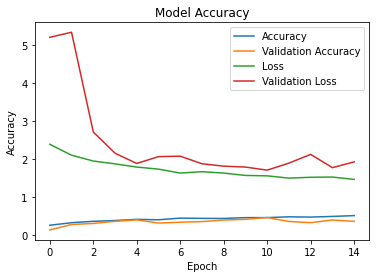

In [187]:
# Display graph of accuracy and validation accuracy against the epoch
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

In [ ]:
# Get images from the test set and their predictions by the network
# imgs = test_ds
# predictions = network.predict(imgs)

In [ ]:
# Display images and their predictiona and actual label
# fig = plt.figure(figsize=(5, 5))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
# for img in imgs:
#     ax = fig.add_subplot(5, 10, i+1)
#     ax.axis('off')
#     ax.text(0.5, -0.35, img, predictions(img), fontsize=15, color='blue', ha='center', transform=ax.transAxes)
#     ax.imshow(img[i], cmap='gray_r')
#     fig.show()
# 